In [1]:
!pip install netCDF4

In [2]:
# notebook with pivpy 

In [3]:
from pivpy import pivpy, io, graphics
import xarray as xr

In [4]:
import glob
file_list = sorted(glob.glob('../OpenPIV_results/Open_PIV_results_6_*/*.txt'))

data = []
frame = 0
for f in file_list:
    data.append(io.load_txt(f,frame=frame))
    frame += 1
    
data = xr.concat(data,dim='t')
data.attrs['units']= ['pix','pix','pix/dt','pix/dt']

In [5]:
data.piv.vorticity()

<xarray.Dataset>
Dimensions:  (t: 10, x: 340, y: 169)
Coordinates:
  * x        (x) float64 2.5 5.5 8.5 11.5 ... 1.014e+03 1.016e+03 1.02e+03
  * y        (y) float64 3.5 6.5 9.5 12.5 15.5 ... 495.5 498.5 501.5 504.5 507.5
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    u        (x, y, t) float64 -2.67 -2.505 -2.541 ... -2.358 -2.357 -2.185
    v        (x, y, t) float64 -0.0985 0.0037 0.0327 ... -0.0097 0.0281 0.0162
    chc      (x, y, t) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    w        (x, y, t) float64 0.0243 0.06077 -0.01977 ... -0.015 0.02593
Attributes:
    variables:  None
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
    dt:         None
    files:      ../OpenPIV_results/Open_PIV_results_6_0/field_A000.txt

In [6]:
import matplotlib.pyplot as plt

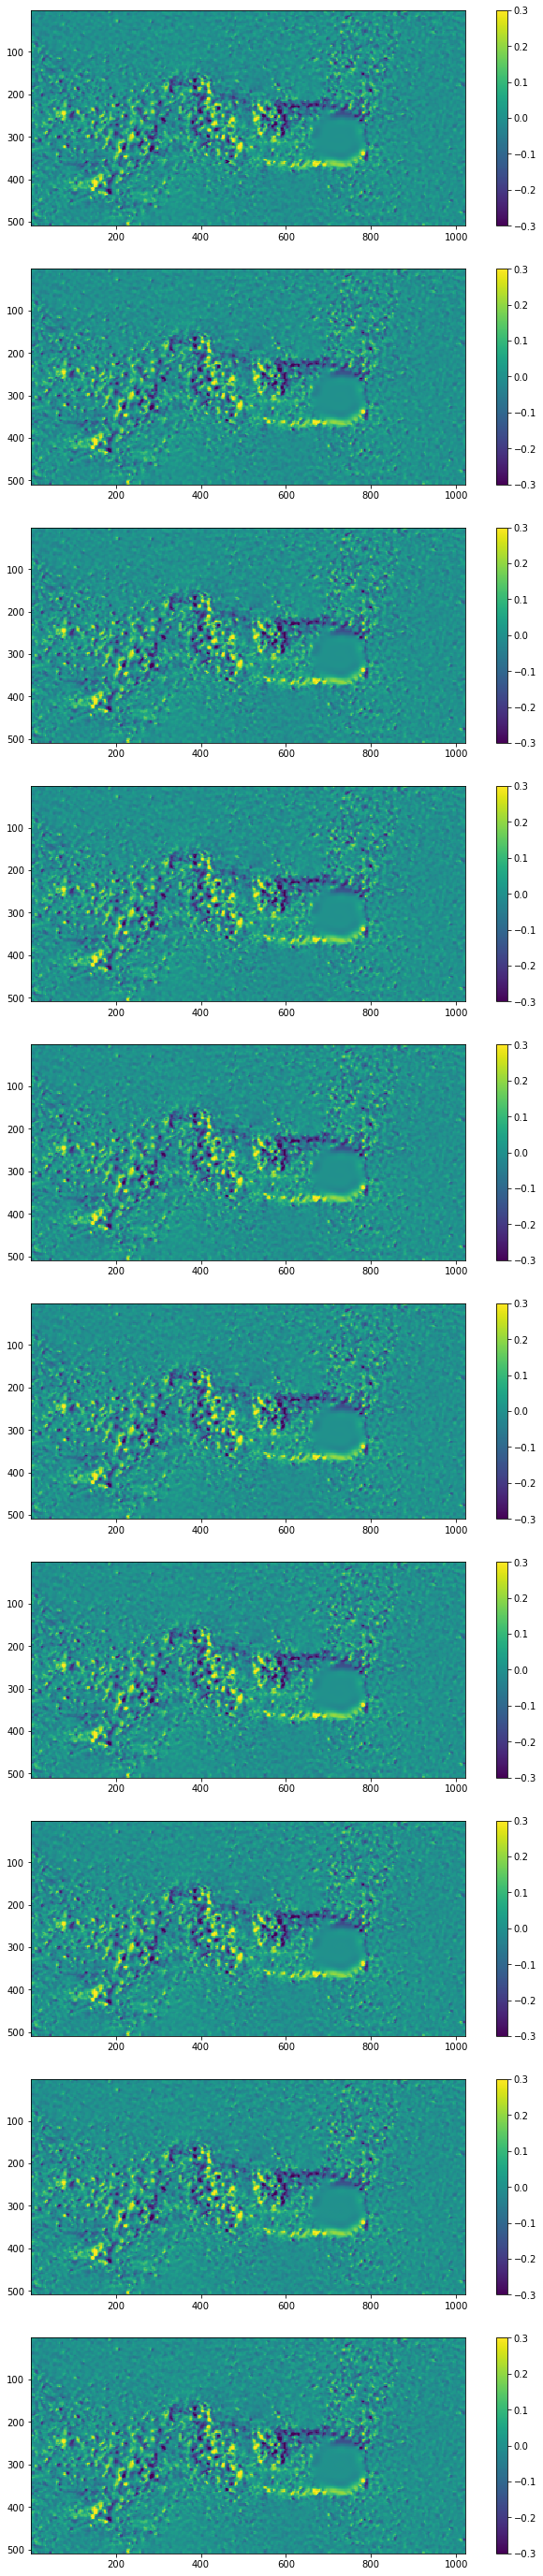

In [7]:
fig, axs = plt.subplots(10,1,figsize=(12,50))
for ax in axs:
    s = ax.pcolor(data.x,data.y,data.w.T.isel(t=0), shading='nearest', vmin=-.3, vmax=.3)
    ax.invert_yaxis()
    ax.set_aspect(1)
    fig.colorbar(s, ax=ax,)


In [19]:
# validate attributes before storing
for k, v in data.attrs.items():
    if not isinstance(v, valid_types) or isinstance(v, bool):
        data.attrs[k] = str(v)

In [20]:
data.attrs

{'variables': 'None',
 'units': ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt'],
 'dt': 'None',
 'files': '../OpenPIV_results/Open_PIV_results_6_0/field_A000.txt'}

In [25]:
data.to_netcdf('../OpenPIV_results/openpiv_results.nc')

In [8]:
# data.to_dataframe().to_csv('openpiv_results.csv')